Imports

In [1]:
import undetected_chromedriver as uc 
from time import sleep 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import pandas as pd
import re

from datetime import date

# Web scraper

In [2]:
chromeOptions = uc.ChromeOptions() 
chromeOptions.headless = True
driver = uc.Chrome(use_subprocess=True, options=chromeOptions)

df = pd.DataFrame(columns=['Name', 'Height', 'Image', 'URL'])

a_to_z = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
# for each letter, get all celebs
for letter in a_to_z:
    driver.get(f"https://www.celebheights.com/s/all{letter}.html")
    sleep(1)

    celeb_entries = driver.find_elements(By.CLASS_NAME, 'sAZ2.v11')
    celeb_entries_len = len(celeb_entries)

    for i in range(celeb_entries_len):
        print(f"{letter}: {i}/{celeb_entries_len - 1}")

        celeb_entry = celeb_entries[i]
        if celeb_entry.text != '' and 'cm' in celeb_entry.text:
            celeb_data = []

            link_element = celeb_entry.find_element(By.CLASS_NAME, 'sAZlink')
            name = link_element.text
            celeb_data.append(name)

            height_text = celeb_entry.text
            height_cm = re.search('\((.+?)cm\)', height_text).group(1)
            celeb_data.append(int(height_cm))

            formatted_name = name.replace(' ', '').lower()
            image_url = f"https://www.celebheights.com/tr/{formatted_name[0]}/{formatted_name}.jpg"
            celeb_data.append(image_url)

            url = link_element.get_attribute('href')
            celeb_data.append(url)

            # add data to df
            df = pd.concat([pd.DataFrame([celeb_data], columns=df.columns), df], ignore_index=True)

A: 0/583
A: 1/583
A: 2/583
A: 3/583
A: 4/583
A: 5/583
A: 6/583
A: 7/583
A: 8/583
A: 9/583
A: 10/583
A: 11/583
A: 12/583
A: 13/583
A: 14/583
A: 15/583
A: 16/583
A: 17/583
A: 18/583
A: 19/583
A: 20/583
A: 21/583
A: 22/583
A: 23/583
A: 24/583
A: 25/583
A: 26/583
A: 27/583
A: 28/583
A: 29/583
A: 30/583
A: 31/583
A: 32/583
A: 33/583
A: 34/583
A: 35/583
A: 36/583
A: 37/583
A: 38/583
A: 39/583
A: 40/583
A: 41/583
A: 42/583
A: 43/583
A: 44/583
A: 45/583
A: 46/583
A: 47/583
A: 48/583
A: 49/583
A: 50/583
A: 51/583
A: 52/583
A: 53/583
A: 54/583
A: 55/583
A: 56/583
A: 57/583
A: 58/583
A: 59/583
A: 60/583
A: 61/583
A: 62/583
A: 63/583
A: 64/583
A: 65/583
A: 66/583
A: 67/583
A: 68/583
A: 69/583
A: 70/583
A: 71/583
A: 72/583
A: 73/583
A: 74/583
A: 75/583
A: 76/583
A: 77/583
A: 78/583
A: 79/583
A: 80/583
A: 81/583
A: 82/583
A: 83/583
A: 84/583
A: 85/583
A: 86/583
A: 87/583
A: 88/583
A: 89/583
A: 90/583
A: 91/583
A: 92/583
A: 93/583
A: 94/583
A: 95/583
A: 96/583
A: 97/583
A: 98/583
A: 99/583
A: 100/583

Save to csv

In [3]:
df.to_csv(f"data/celeb-heights-{date.today()}.csv", index=False)

# Data Analysis

Loading df. Either from cells before or csv

In [27]:
load_from_csv = True
csv_path = 'data/celeb-heights-2024-03-26.csv'

if load_from_csv:
    df = pd.read_csv(csv_path)

171.0

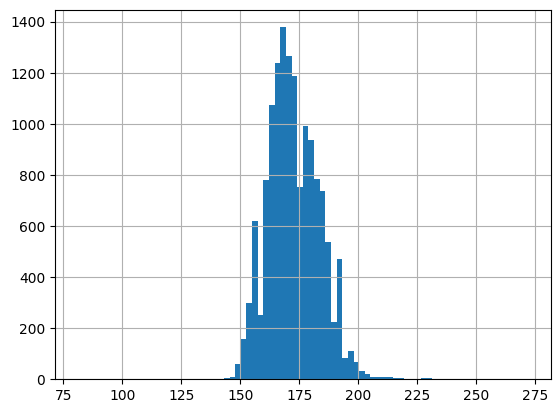

In [36]:
hist = df['Height'].hist(bins=80)

df['Height'].median()